# Udacity - Data Analyst NanoDegree Program                            
## Project #5: Student Intervention System - Dataset Exploration
### by Samuel Jiménez Sanabria

## Investigation Overview

> During my research to study Machine Learning at Udacity I discovered a capstone project called "Building a Student Intervention System". I was instantly captured by this project as it lies very close to my daily job as an Educational IT Strategist and Analyst. Upon contacting Udacity I discovered that the project wasn't part of the program anymore but the the code and projects from the students were available on GitHub for everyone to study. I immediately started to study the notebooks and eventualy started to develop my own models. The focus of the Student Intervention System capstone projects is the development of the prediction models, not the visualizations. And even if some projects show maybe one or two charts, visualizations for this project have not been explored. That's the main reason I choose this dataset to work with visualizations; to study the dataset to get information about how the school works both socially and academically if possible.

## Dataset Overview

> The dataset collects a number of features that can be related to the student success. The last column "passed", indicates if the student managed to pass the final exams or not. This dataset is intended to be used to create prediction models but can also be used to study social and pedagogical conditions where the learning process has been taking place. The dataset includes observations for a single school of 395 students, which is not a lot, but probably enough to get some insights..

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})
sns.set_palette("deep", desat=0.5)
sns.set_style("darkgrid")
base_color = sns.color_palette()[0]

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
student_data = pd.read_csv('student-data.csv', sep=';') 

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Positive and negative factors affecting student results

> Some aspects have a stronger relation to if a student passes the final exams. Some features have a positive correlation and others a negative correlation. While in the middle of the graph, features with a 'close to zero' correlation coefficient are represented. At the same time, in general, correlation coefficients are very low considering that a strong correlation coefficient should be much closer 1 or -1 (negative correlation).

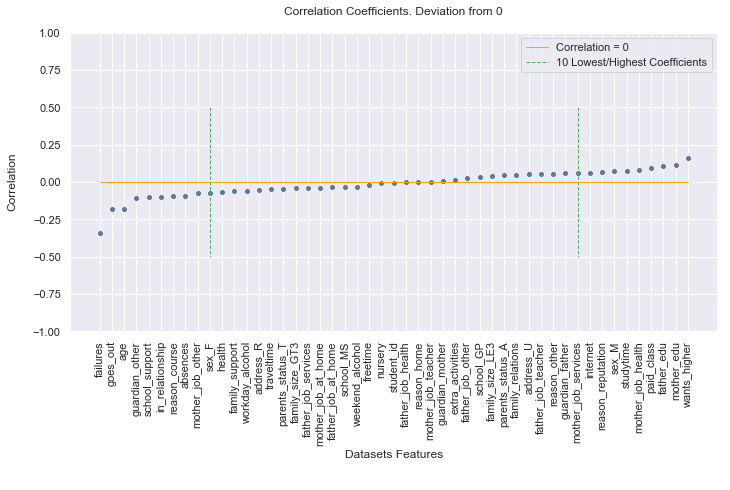

In [4]:
# Preprocess categorical columns
def preprocess_features(X):
    df_preprocess = pd.DataFrame(index=X.index) # output empty dataframe
    # loop to iterate through each column
    for colname, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=colname)  
        # join columns to the empty dataframe
        df_preprocess = df_preprocess.join(col_data)  
    return df_preprocess

student_data_model = preprocess_features(student_data)
# Create a data correlation dataframe:
corr_df_master = student_data_model.corr()
corr_target = corr_df_master.iloc[-1][:-1] # The correlation target is the 'passed' column 
corr = corr_target.sort_values(ascending=True)
corr_df = pd.DataFrame(corr)
corr_df.reset_index(level=0, inplace=True)
corr_df.columns = ['features', 'correlation']

''' Creating an horizontal view of the correlations in relation to the middle value 0
produces a very concise view of how each feature relates to the target "passed".
This is a great help and guide to choose the features we want to explore. '''

f = len(corr_df.features) -1
sns.relplot(x='features', y='correlation', data=corr_df, aspect=20/10)

plt.ylim([-1, 1]) # Use this code to see correlations in total (-1, 1) correlation values. 
                  # This is a more realistic view of the variability of the correlation coeficients
                  # and it's relation to the extreme values of -1 and 1.

# plt.ylim([-0.2, 0.2]) # Use this code for a better apreciation of differences in correlation values.

plt.xticks(rotation=90);
plt.plot([0, f], [0, 0], linewidth=1, c='orange');
plt.plot([9, 9], [0.5, -0.5], linewidth=1, c='g', linestyle='--');
plt.plot([39, 39], [0.5, -0.5], linewidth=1, c='g', linestyle='--');

plt.title("Correlation Coefficients. Deviation from 0\n")
plt.xlabel("Datasets Features\n\n")
plt.ylabel("Correlation\n")
plt.legend(['Correlation = 0', '10 Lowest/Highest Coefficients'])
plt.show()

## Family Relations 

> Most of the students have families where relations are very good or excellent.

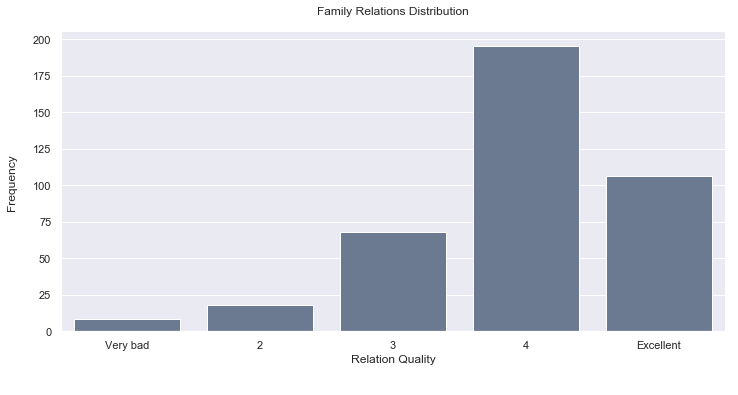

In [5]:
g = sns.catplot(x='family_relations', data=student_data, kind='count', 
                aspect=20/10, color=base_color)
g.set_xticklabels(['Very bad','2', '3', '4', 'Excellent'])
plt.title("Family Relations Distribution\n")
plt.xlabel("Relation Quality\n\n")
plt.ylabel("Frequency\n")
plt.show()



## Traveltime
> Most of the students live very close to the school.

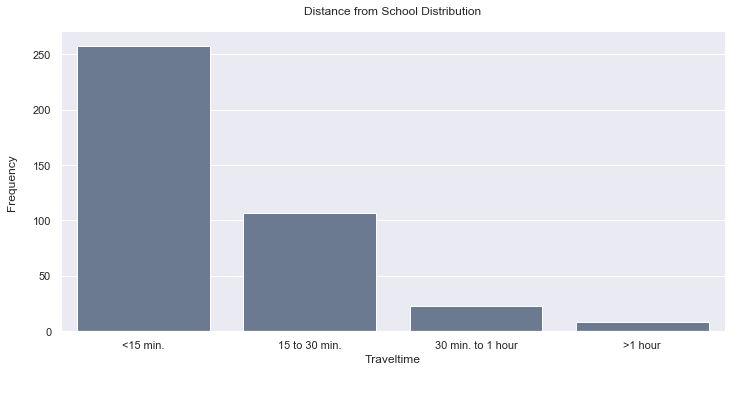

In [6]:
g = sns.catplot(x='traveltime', data=student_data, kind='count', 
                aspect=20/10, color=base_color)
g.set_xticklabels(['<15 min.', '15 to 30 min.', '30 min. to 1 hour', '>1 hour']);
plt.title("Distance from School Distribution\n")
plt.xlabel("Traveltime\n\n")
plt.ylabel("Frequency\n")
plt.show()

## Social Relations

> Most of the students go out and socialize normally.

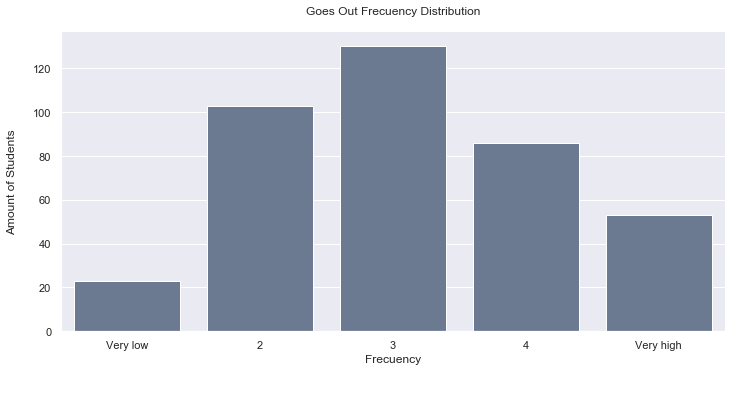

In [7]:
g = sns.catplot(x='goes_out', data=student_data, kind='count', 
                aspect=20/10, color=base_color)
g.set_xticklabels(['Very low', '2', '3', '4', 'Very high']);
plt.title("Goes Out Frecuency Distribution\n")
plt.xlabel("Frecuency\n\n")
plt.ylabel("Amount of Students\n")
plt.show()


## Study Time
> A big number of students study two to five hours a week or more.

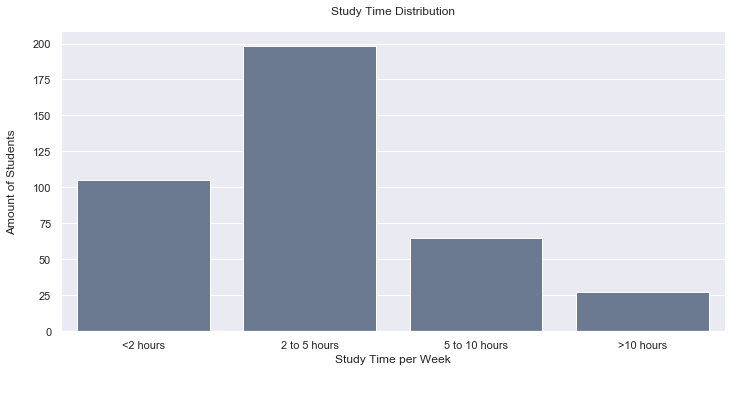

In [8]:

g = sns.catplot(x='studytime', data=student_data, kind='count', 
                aspect=20/10, color=base_color)
g.set_xticklabels(['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours']);
plt.title("Study Time Distribution\n")
plt.xlabel("Study Time per Week\n\n")
plt.ylabel("Amount of Students\n")
plt.show()

## Show up, study and you'll pass!

> The amount of students that fail (blue) decreases as the study time increases. The number of absences decreases with increasing study time as well.

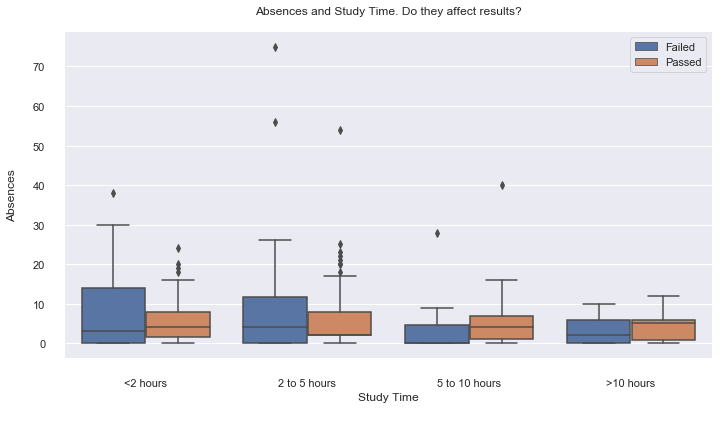

In [9]:
sns.set(rc={'figure.figsize':(11.6,6)})
g = sns.boxplot(x="studytime", y="absences", hue="passed", data=student_data)
handles, _ = g.get_legend_handles_labels()
g.legend(handles, ["Failed", "Passed"])
sns.despine(offset=10, trim=True)
g.set_xticklabels(['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours']);

plt.title("Absences and Study Time. Do they affect results?\n")
plt.xlabel("Study Time\n\n")
plt.ylabel("Absences\n")
plt.show()


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!